In [1]:
import random
from scipy import stats 
from scipy.stats import bernoulli, binom, geom, poisson, norm, t
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**Percentile point function (PPF)**

- the inverse of the CDF (in continuos variable/ for discrete is the inverse of PMF). Answers the question “Given a certain probability, what is the corresponding value for the CDF?”

- it's equivalent to quantil

Example: Given that I am looking for a man who is smaller than 95% of all other men, what size does the man have to be?

**Probability mass function (PMF)**

- it's used for discrete random variable

- a probability mass function is a function that gives the probability that a discrete random variable is exactly equal to some value


**Probability density function (PDF)**

- it's used for continuos random variable

- describes the relative likelihood for a random variable X to take on a given value x

- note that to obtain the probability for the variable appearing in a certain interval, you have to integrate the PDF over that range.

Example: What is the chance that a man is between 160 and 165 cm tall?

**Cumulative distribution function (CDF)** 

- the probability to find a value between a and b is given by the integral over the PDF in that range (or sum the pmfs)

- gives the probability of obtaining a value smaller than the given value

Example: What is the chance that a man is less than 165 cm tall?


mean : 0.5
var : 0.25
skew : 0.0
kurt : -2.0


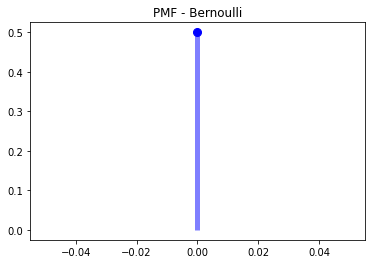

In [31]:
# BERNOULLI
# Exemplo: eu lanço uma moeda

p=.5
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')

for name,element in zip(['mean', 'var', 'skew', 'kurt'],[mean, var, skew, kurt]):
    print(name,':',element)
    
fig, ax = plt.subplots(1, 1)

x = np.arange(bernoulli.ppf(0.01,p),bernoulli.ppf(0.99,p))
ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)
plt.title('PMF - Bernoulli')
plt.show()

In [27]:
# x = np.arange(binom.ppf(0.01, n, p),binom.ppf(0.99, n, p))
# pmf = binom.pmf(x,n, p)
# np.cumsum(pmf)

mean : 50.0
var : 25.0
skew : 0.0
kurt : -0.02


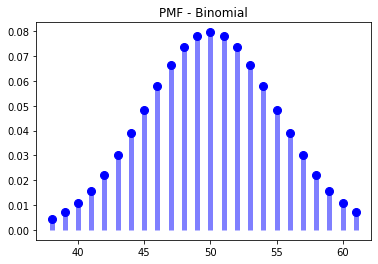

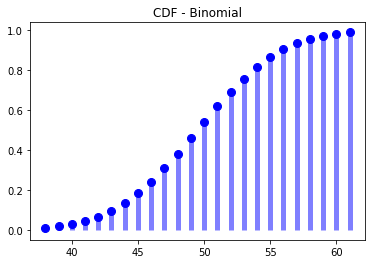

In [32]:
# BERNOULLI
# Exemplo soma do número de moedas que deram cara (repetições de bernoullis)

n,p=100, .5
mean, var, skew, kurt = binom.stats(n,p, moments='mvsk')

for name,element in zip(['mean', 'var', 'skew', 'kurt'],[mean, var, skew, kurt]):
    print(name,':',element)
    
fig, ax = plt.subplots(1, 1)

# ppf(q, n, p, loc=0) - Percent point function (inverse of cdf — percentiles).
# inverte a cdf - pega limites direitos e esquerdo

x = np.arange(binom.ppf(0.01, n, p),binom.ppf(0.99, n, p))

# Probability mass function.

ax.plot(x, binom.pmf(x,n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x,n, p), colors='b', lw=5, alpha=0.5)
plt.title('PMF - Binomial')
plt.show()

# CDF - distribuição cumulativa

fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.cdf(x,n, p, loc=0), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0,binom.cdf(x,n, p,loc=0), colors='b', lw=5, alpha=0.5)
plt.title('CDF - Binomial')
plt.show()

# # example
# coins =  [random.randint(0,1) for i in range(0,100)]
# pd.Series(coins, name='c\k').value_counts().to_frame


mean : 5.88235294117647
var : 28.719723183391
skew : 2.008685957811333
kurt : 6.034819277108434


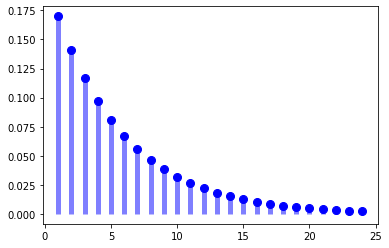

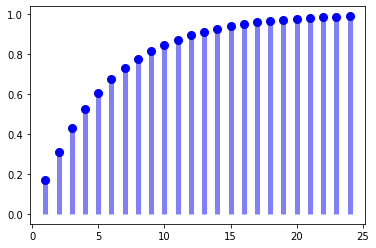

In [29]:
#  geometrica
# Dado um evento, qual a chance do primeiro sucesso

p = 0.17
mean, var, skew, kurt = geom.stats(p, moments='mvsk')

for name,element in zip(['mean', 'var', 'skew', 'kurt'],[mean, var, skew, kurt]):
    print(name,':',element)
    
    
# ppf(q, n, p, loc=0) - Percent point function (inverse of cdf — percentiles).
# inverte a cdf - pega limites direitos e esquerdo

x = np.arange(geom.ppf(0.01,p),geom.ppf(0.99, p))

# Probability mass function.

fig, ax = plt.subplots(1, 1)
ax.plot(x, geom.pmf(x, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, geom.pmf(x, p), colors='b', lw=5, alpha=0.5)
plt.show()

# CDF - distribuição cumulativa

fig, ax = plt.subplots(1, 1)
ax.plot(x, geom.cdf(x, p, loc=0), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0,geom.cdf(x, p, loc=0), colors='b', lw=5, alpha=0.5)
plt.show()

You throw darts at a board until you hit the center area. Your probability of hitting the center area is p = 0.17. You want to find the probability that it takes eight throws until you hit the center. What values does X take on?

In [34]:
# Usando a pmf
print('usando a distribuição:',geom.pmf(8, 0.17))

# Ou usando análise combinatória
print('ou pelo calculo:(0.17)*(1-0.17)**7=',(0.17)*(1-0.17)**7)

usando a distribuição: 0.04613128668236589
ou pelo calculo:(0.17)*(1-0.17)**7= 0.04613128668236589


mean : 0.6
var : 0.6
skew : 1.2909944487358056
kurt : 1.6666666666666667


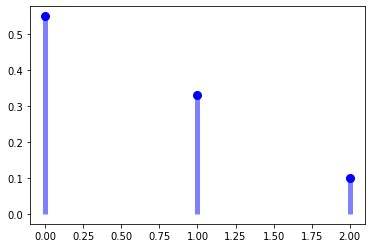

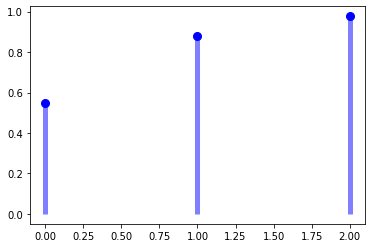

In [36]:
# poisson
# Contagem de eventos a cada unidade de tempo, volume, area, comprimento

mu = 0.6
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

for name,element in zip(['mean', 'var', 'skew', 'kurt'],[mean, var, skew, kurt]):
    print(name,':',element)
    
# ppf(q, n, p, loc=0) - Percent point function (inverse of cdf — percentiles).
# inverte a cdf - pega limites direitos e esquerdo

x = np.arange(poisson.ppf(0.01,mu),poisson.ppf(0.99, mu))

# Probability mass function.

fig, ax = plt.subplots(1, 1)
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()

# CDF - distribuição cumulativa

fig, ax = plt.subplots(1, 1)
ax.plot(x, poisson.cdf(x, mu, loc=0), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0,poisson.cdf(x, mu, loc=0), colors='b', lw=5, alpha=0.5)
plt.show()

Many experimental situation occur in which we observe the counts of
events within a set unit of time, area, volume, length etc. For example,
The number of cases of a disease in different towns;
The number of mutations in given regions of a chromosome;
The number of dolphin pod sightings along a flight path through a
region;
The number of particles emitted by a radioactive source in a given
time;
The number of births per hour during a given day.
In such situations we are often interested in whether the events occur
randomly in time or space, or not.

Suppose there is a disease, whose average incidence is 2 per million
people. What is the probability that a city of 1 million people has at least
twice the average incidence?

In [40]:
mu = 2

print('resposta:',sum([poisson.pmf(n , mu) for n in range(4,1000)]))

print('alternativamente:',1- poisson.cdf(3,2))


resposta: 0.14287653950145296
alternativamente: 0.14287653950145296


most probables values:
[0. 1. 2. 3. 4. 5. 6. 7.]
[ 5.  6.  7.  8.  9. 10. 11. 12.]


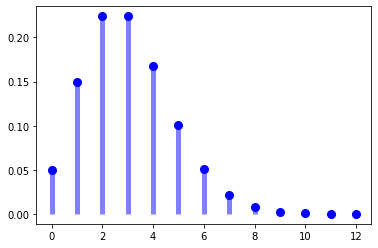

In [50]:
# Probability mass function.

mu=3
print('most probables values:')
print(np.arange(poisson.ppf(0.01,mu),poisson.ppf(0.99, mu)))

print(x)

mu=3
fig, ax = plt.subplots(1, 1)
# x = np.arange(0,20)
x = np.arange(poisson.ppf(0.01,mu),poisson.ppf(0.99, mu) + 5)
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()

# mu=4
# fig, ax = plt.subplots(1, 1)
# x = np.arange(0,20)
# ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='binom pmf')
# ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
# plt.show()

# mu=5
# fig, ax = plt.subplots(1, 1)
# x = np.arange(0,20)
# ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='binom pmf')
# ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
# plt.show()

mean : 0.0
var : 1.0
skew : 0.0
kurt : 0.0


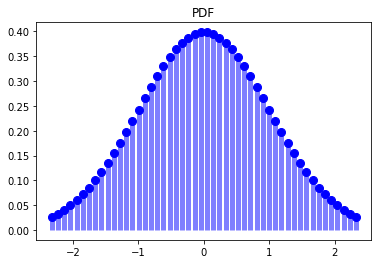

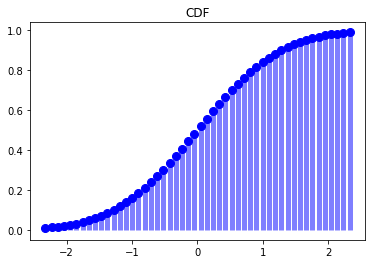

In [93]:
mean, var, skew, kurt = norm.stats(moments='mvsk')

for name,element in zip(['mean', 'var', 'skew', 'kurt'],[mean, var, skew, kurt]):
    print(name,':',element)
    
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),norm.ppf(0.99),50)
ax.plot(x, norm.pdf(x, loc=0), 'bo', ms=8, label='normal pmf')
ax.vlines(x, 0,norm.pdf(x, loc=0), colors='b', lw=5, alpha=0.5)
plt.title('PDF')
plt.show()

# CDF - distribuição cumulativa

fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.cdf(x, loc=0), 'bo', ms=8, label='normal pmf')
ax.vlines(x, 0,norm.cdf(x, loc=0), colors='b', lw=5, alpha=0.5)
plt.title('CDF')
plt.show()


In [63]:
import pandas as pd
from scipy import stats

df = pd.DataFrame({'Height':[64,66,68,69,73], 'Score':[580,570,590,660,600], 'Age':[29,33,37,46,55]})

,Height,Score,Age
0,64,580,29
1,66,570,33
2,68,590,37
3,69,660,46
4,73,600,55


In [74]:
df.mean().to_frame().T

,Height,Score,Age
0,68.0,600.0,40.0


In [75]:
df.median().to_frame().T

,Height,Score,Age
0,68.0,590.0,37.0


In [76]:
df.var().to_frame().T

,Height,Score,Age
0,11.5,1250.0,110.0


In [77]:
df.std().to_frame().T

,Height,Score,Age
0,3.391165,35.355339,10.488088


In [64]:
# TESTE KS
np.random.seed(987654321) # set random seed to get the same result
stats.kstest(stats.norm.rvs(size=100), stats.norm.cdf)


KstestResult(statistic=0.058352892479417884, pvalue=0.8653960860778898)

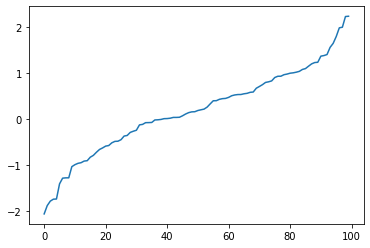

In [68]:
# O que é a função norm.rvs?
# É um função utilizada para gerar números aleatórios de acordo com uma Distribuição normal padrão
plt.plot( np.arange(0,100), np.sort(stats.norm.rvs(size=100)));

# Exercícios

A expectativa de vida de lagartos em um determinado zoológico tem distribuição normal. A expectativa de vida média de um lagarto é de 3,1 anos e o desvio-padrão é 0,6 anos.

Use a regra empírica (68-95-99,7%) para estimar a probabilidade de um lagarto viver menos do que 2.5 anos.

Resposta: 16% = (100% - 68%)/2

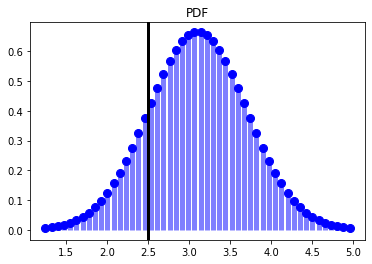

In [109]:
norm.cdf(2.5, loc=3.1,scale=0.6)
fig, ax = plt.subplots(1, 1)

x = np.linspace(norm.ppf(0.001,loc=3.1,scale=0.6),norm.ppf(0.999,loc=3.1,scale=0.6),50)
ax.plot(x, norm.pdf(x, loc=3.1,scale=0.6), 'bo', ms=8, label='normal pmf')
ax.vlines(x, 0,norm.pdf(x, loc=3.1,scale=0.6), colors='b', lw=5, alpha=0.5)
plt.title('PDF')

plt.axvline(2.5, lw=3, c='black' )

plt.show()

In [110]:
norm.cdf(2.5, loc=3.1,scale=0.6)

0.15865525393145702

# Intervalo de Confiança

Um nutricionista deseja estimar o valor calórico dos burritos de um restaurante popular. Ele obtém uma amostra aleatória de 14 burritos e mede o valor calórico de cada. A amostra é aproximadamente simétrica, com uma média de 700 calorias e desvio-padrão de 50 calorias.

Com base nessa amostra, qual dos valores a seguir é um intervalo de confiança de 95% para a média do valor calórico destes burritos?


$ \bar{x} \pm z_{\alpha/2}\frac{\sigma}{\sqrt{n}} $

Nós vamos usar um intervalo t — e não um intervalo z — porque não conhecemos o desvio-padrão da população e precisamos usar o desvio-padrão da amostra em seu lugar.

In [156]:
# gl = amostras - 1

print(stats.t.interval(alpha= 0.95, df=13, loc=700, scale=50/np.sqrt(14)))

print('IC : {} +{:.2f}'.format(700, t.ppf(0.025, df=13, loc=0, scale=1) * 50 / np.sqrt(14)))

print('esquerda:',t.ppf(0.025, df=13, loc=700, scale=50/ np.sqrt(14)))

print('direita:',t.ppf(1-0.025, df=13, loc=700, scale=50/ np.sqrt(14)))

(671.1308594942777, 728.8691405057223)
IC : 700 +-28.87
esquerda: 671.1308594942777
direita: 728.8691405057223


Émerson construiu um intervalo z de uma única amostra para uma proporção e usou o valor crítico de z*=1,476 

Qual foi o nível de confiança que ele usou?

0.8600561077685378

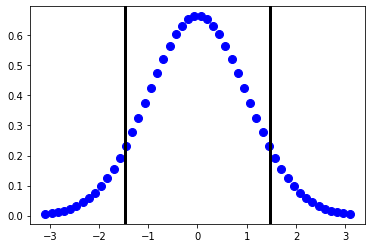

In [166]:
plt.plot(np.linspace(norm.ppf(0.001,loc=0,scale=1),norm.ppf(0.999,loc=0,scale=1),50), 
        norm.pdf(x, loc=3.1,scale=0.6), 
        'bo', ms=8, label='normal pmf')

plt.axvline(-1.476, lw=3, c='black' )
plt.axvline(+1.476, lw=3, c='black' )


1 - 2*(norm.cdf(-1.476, loc=0,scale=1))

Uma médica colheu uma amostra aleatória de n=6 pacientes para verificar quanto tempo eles ficavam aguardando na sala de espera. Ela quer construir um intervalo ttt com 99% de confiança para o tempo médio de espera. Os tempos de espera na amostra eram aproximadamente simétricos, com média de 8,5 minutos e um desvio-padrão de 2.8

Qual é o valor crítico t?

In [195]:
p = 0.99
alpha = (1-p)/2
n=6
media=8.5
s = 2.8

print('t_crit:',t.ppf(q = alpha , df=n-1, loc=0, scale=s/ np.sqrt(n)))

t_crit: -4.609123343841029


Vitória quer estimar o peso médio das maçãs em sua horta. Ela vai amostrar nnn maçãs e construir um intervalo de confiança de 95%  para a média dos pesos. Ela está disposta a usar sigma=15 gramas como uma estimativa do desvio-padrão, e quer que a margem de erro não seja superior a 5 gramas.

Qual destas opções mostra o menor tamanho amostral aproximado necessário para obter a margem de erro desejada?

In [209]:
p=0.95
alpha = (1-p)/2
sigma=15
error=5

print([stats.norm.interval(alpha= p, loc=0, scale=15/np.sqrt(n)) for n in [5,15,25,30,35]])

(norm.ppf(q = 1-alpha , loc=0, scale=1)*sigma/error)**2


[(-13.147838108648722, 13.147838108648722), (-7.59090787128996, 7.59090787128996), (-5.879891953620162, 5.879891953620162), (-5.3675824311514715, 5.3675824311514715), (-4.969415701946049, 4.969415701946049)]


34.573129386247125

Um analista de mercado está curioso quanto à proporção de residentes do Rio de Janeiro que têm um telefone fixo. Uma pesquisa com 200 residentes do Rio de Janeiro selecionados ao acaso verificou que 96 deles têm um telefone fixo. O analista quer usar esses dados para construir um intervalo zzz de amostra única para uma proporção.

Com base nessa amostra, qual das opções a seguir é um intervalo de confiança de 90% para a proporção de residentes do Rio de Janeiro que possuem telefone fixo?


$ \hat{p} \pm z*{\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}} $

In [231]:
print(norm.ppf(q = (1-0.9)/2 , loc=0, scale=1)*np.sqrt((96/200*(1-96/200))/200)) 

# stats.norm.interval(alpha= 0.9,  loc=0, scale=np.sqrt((96/200)*(1-0.96/200)/(200)))[1] - 96/200

-0.058107815573389766


In [246]:
# problema de z_critico e problemas com proporção

p=0.95
z_c = norm.ppf(q = 1 - (1 -p)/2 , loc=0, scale=1)
print('z_crit:',z_c)
p_hat= 0.9


[z_c*np.sqrt(p_hat*(1-p_hat)/n) for n in [366,588,865,1116]]


z_crit: 1.959963984540054


[0.030734687593697154,
 0.024248265730203677,
 0.019992232418277873,
 0.017600996170245877]

Nádia quer estimar a média de autonomia do novo veículo elétrico de sua empresa. Ela amostrará veículos e medirá cada autonomia para construir um intervalo de confiança para a média da autonomia. Ela quer que a margem de erro seja de não mais de 10 quilômetros, com um nível de confiança de 90%. Um estudo piloto sugere que as autonomias desse tipo de veículo têm um desvio-padrão de 15 quilômetros.
Quais dessas opções é o menor tamanho amostral aproximado necessário para obter a margem de erro desejada?

In [247]:
p=0.90
alpha = (1-p)/2
sigma=15
error=10

print([stats.norm.interval(alpha= p, loc=0, scale=15/np.sqrt(n)) for n in [5,7,10,15,30]])

print('maior que:',(norm.ppf(q = 1-alpha , loc=0, scale=1)*sigma/error)**2)

[(-11.03401356870172, 11.034013568701715), (-9.325443514320442, 9.325443514320439), (-7.802225818133364, 7.802225818133361), (-6.370490704131921, 6.370490704131918), (-4.504617176377546, 4.504617176377544)]
maior que: 6.087472771714678


**A condição de normalidade**

A condição de normalidade para esse tipo de intervalo de confiança diz que precisamos de pelo menos 10 sucessos e 10 fracassos em nossos dados amostrais. Isso pode ser escrito assim:

$n\hat{p} \geq 10$ e  $ n(1 - \hat{p}) \geq 10$ 


**A condição de independência**

A condição de independência diz que, quando amostramos sem reposição, ainda podemos tratar cada observação na amostra como independente desde de que amostremos menos de %10 da população.


# Para teste de hipótese

A condição de aleatoriedade - AAS é uma amostra aleatória simples

A condição de normalidad - n é maior ou igual a 30

A condição de independência - A condição de independência diz que quando estivermos amostrando sem reposição, podemos tratar cada observação na amostra como se fosse independente, desde que a amostra seja inferior a 10%

In [78]:
data = {'Name': ['kevin', 'duke', 'jonas', 'angly', 'anjelo', 'wily', 'nick'],
        'Type': ['A', 'B', 'A', 'A', 'B', 'A', 'A'],
        'Turnover': [5, 10, 12, 2, 10, 4, 8]}
df = pd.DataFrame(data)
df

,Name,Type,Turnover
0,kevin,A,5
1,duke,B,10
2,jonas,A,12
3,angly,A,2
4,anjelo,B,10
5,wily,A,4
6,nick,A,8


In [99]:
t_value,p = stats.ttest_ind(df.Turnover[df.Type.eq('A')], df.Turnover[df.Type.eq('B')], 
                      equal_var=False, alternative='less')

print(t_value)

if p < 0.05:
    print('Type A players have average less turnovers than Type B players')
else:
    print('Null hypothesis (equal means) cannot be rejected.')

-2.179449471770337
Type A players have average less turnovers than Type B players


O Colégio Santa Maria exige que os alunos recebam uma média de 2.5 horas de lição de casa toda noite. A diretoria acredita que o tempo médio que eles passam por noite fazendo a lição de casa não é de 2.5 horas, então eles decidiram colher uma amostra aleatória de 16 alunos para saber se existem evidências suficientes para suportar essa suspeita. A diretoria descobre que os alunos da amostra dedicaram uma média de 2.8 por noite à lição de casa, com um desvio-padrão de 0.8 horas.

A diretoria quer usar esses dados amostrais para realizar um teste t na média. Considere que todas as condições para inferência foram atendidas.

prob integrada: 0.9228166698091497
pvalor: 0.07718333019085033
valor de t 1.4999999999999991


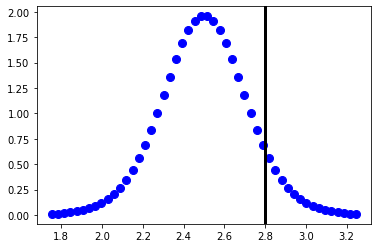

In [109]:
x = 2.8
media = 2.5
desvio= 0.8
n=16

x_grid = np.linspace(t.ppf(0.001,df=n-1, loc=media,scale=desvio/np.sqrt(n)),t.ppf(0.999,df=n-1,  loc=media,scale=desvio/np.sqrt(n)),50)
plt.plot(x_grid, 
        t.pdf(x_grid, df=n-1, loc=media,scale=desvio/np.sqrt(n)), 
        'bo', ms=8, label='t pmf')

plt.axvline(+x, lw=3, c='black' )

print('prob integrada:',t.cdf(x, df=n-1, loc=media,scale=desvio/np.sqrt(n)))

p = 1 - t.cdf(x, df=n-1, loc=media,scale=desvio/np.sqrt(n))

print('pvalor:',p)

print('valor de t',(x-media)/(desvio/np.sqrt(n)))

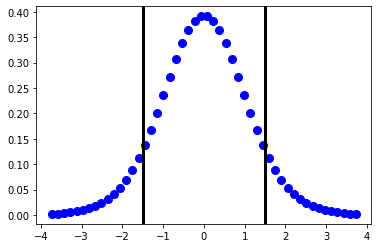

In [105]:
x_grid = np.linspace(t.ppf(0.001,df=n-1, loc=0,scale=1),t.ppf(0.999,df=n-1,  loc=0,scale=1),50)
plt.plot(x_grid, 
        t.pdf(x_grid, df=n-1, loc=0,scale=1), 
        'bo', ms=8, label='t pmf')

plt.axvline(+(x-media)/(desvio/np.sqrt(n)), lw=3, c='black' )
plt.axvline(-(x-media)/(desvio/np.sqrt(n)), lw=3, c='black' )

In [121]:
print('valor de t:',(.68-.5)/np.sqrt((0.5*.5)/100))

pvalue = 1 - t.cdf(.68, df=100-1, loc=0.5,scale=np.sqrt(0.5*0.5/np.sqrt(n)))
print(p)

valor de t: 3.600000000000001
0.23661072095556102


In [138]:
(1-norm.cdf((.14-.1)/np.sqrt(.9*.1/225), loc=0,scale=1))*2

0.04550026389635842

In [131]:
x = .14
media = 0.1
desvio= 0.1*0.9
n=225
scale = np.sqrt(desvio/n)

p = 1 - norm.cdf(x, loc=media,scale=scale)
print(p*2)

0.04550026389635842


# Distribuição Normal

media:0.015017293633971023 - var: 0.9996375036655599


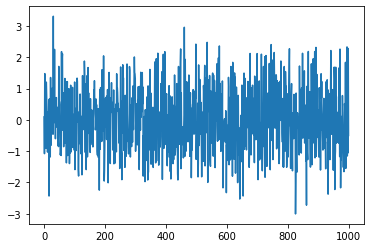

In [2]:
X = stats.norm.rvs(size=1000)

mu = X.mean()
var = X.var()

print(f'media:{mu} - var: {var}')

plt.plot(X);

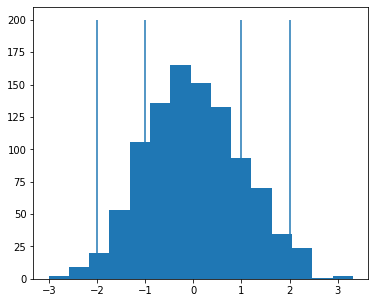

In [8]:
fig, ax = plt.subplots(1,1,figsize=(6,5))

ax.hist(X, bins=15)
ax.vlines(var, ymin=0, ymax=200)
ax.vlines(-var, ymin=0, ymax=200)
ax.vlines(2*var, ymin=0, ymax=200)
ax.vlines(-2*var, ymin=0, ymax=200)

# Distribuição Qui-quadrado


$ \chi^2 = \frac{(Observado - Esperado)^2}{Esperado} $

(array([15., 13., 13., 13., 15.,  8.,  5.,  6.,  5.,  2.,  1.,  2.,  1.,
         0.,  1.]),
 array([ 0.29250394,  1.18111064,  2.06971733,  2.95832402,  3.84693071,
         4.73553741,  5.6241441 ,  6.51275079,  7.40135748,  8.28996417,
         9.17857087, 10.06717756, 10.95578425, 11.84439094, 12.73299763,
        13.62160433]),
 <BarContainer object of 15 artists>)

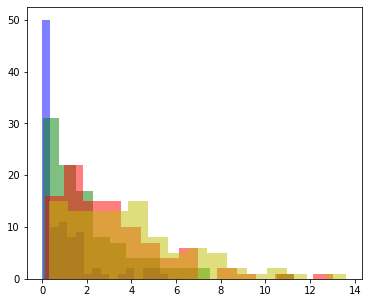

In [56]:
fig, ax = plt.subplots(1,1,figsize=(6,5))

X1= np.random.choice(X,100)
X2= np.random.choice(X,100)
X3= np.random.choice(X,100)
X4= np.random.choice(X,100)


Q1=X1**2
Q2=X1**2 + X2**2
Q3=X1**2 + X2**2 + X3**2
Q4=X1**2 + X2**2 + X3**2 + X4**2


ax.hist(Q1, bins=15, color='b', alpha=0.5)
ax.hist(Q2, bins=15, color='g', alpha=0.5)
ax.hist(Q3, bins=15, color='r', alpha=0.5)
ax.hist(Q4, bins=15, color='y', alpha=0.5)

In [80]:
print(np.sum(Q2>2.41)/ Q2.shape[0])

0.32


In [11]:
df =pd.DataFrame({'correct_choice':['A','B','C','D'],
                  'expected':[0.25,0.25,0.25,0.25],
                  'actual': [0.20,0.20,0.25,0.35]})
df[['expected','actual']]=100*df[['expected','actual']]

In [82]:
df['X^2'] = (df['expected'] - df['actual'])**2/(df['expected'])
df

,correct_choice,expected,actual,X^2
0,A,25.0,20.0,1.0
1,B,25.0,20.0,1.0
2,C,25.0,25.0,0.0
3,D,25.0,35.0,4.0


In [83]:
df['X^2'].sum()

6.0

In [17]:
from scipy.stats import chi2

# gl = 3
# mean, var, skew, kurt = chi2.stats(gl, moments='mvsk')

# values = [chi2.cdf(i,3) for i in range(0,50)]
# plt.plot(values)

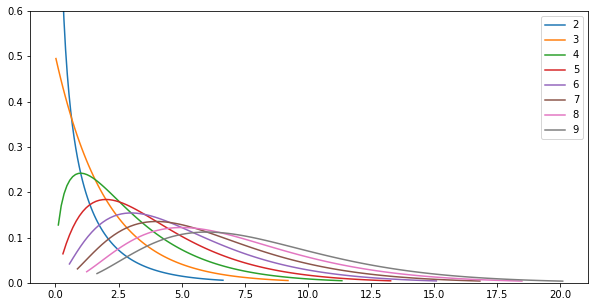

In [41]:

fig, ax = plt.subplots(1,1,figsize=(10,5))


for n_i in range(2,10):

    n=n_i

    x = np.linspace(chi2.ppf(0.01, df=n-1),chi2.ppf(0.99, df=n-1),100)

    ax.plot(x, chi2.pdf(x, df=n-1), label = n_i)
    
    
ax.set_ylim([0,0.6])
plt.legend()

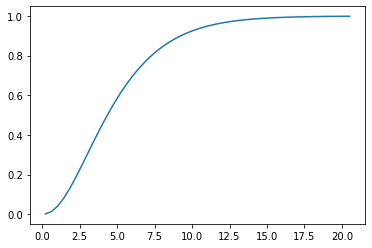

In [18]:
plt.plot(x, chi2.cdf(x, df=n-1))

In [47]:
alpha = 0.05
chi2.ppf(1-alpha, df=5)

11.070497693516351

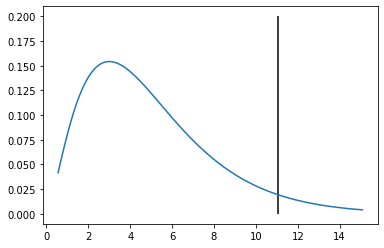

In [52]:
n=6
x = np.linspace(chi2.ppf(0.01, df=n-1),chi2.ppf(0.99, df=n-1),100)

plt.plot(x, chi2.pdf(x, df=n-1), label = n_i)

plt.vlines(chi2.ppf(1-alpha, df=5), ymin=0, ymax=0.2, colors='black')

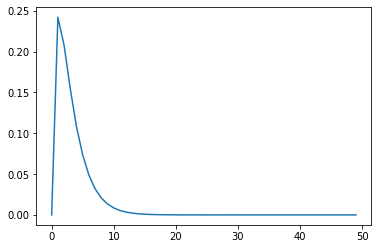

In [85]:
# np.linspace(chi2.ppf(0.001),chi2.ppf(0.999),50)

# values = [chi2.pdf(i,3) for i in range(0,50)]
# plt.plot(values)

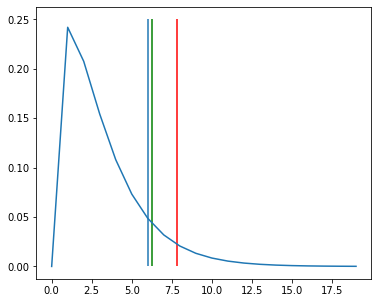

In [86]:
values = [chi2.pdf(i,3) for i in range(0,20)]
fig, ax = plt.subplots(1,1,figsize=(6,5))

ax.plot(values)
ax.vlines(6.25, ymin=0, ymax=0.25, color='g')
ax.vlines(7.81, ymin=0, ymax=0.25, color='r')
ax.vlines(6, ymin=0, ymax=0.25)


In [87]:
from scipy.stats import chi2_contingency
chi2_contingency(df[['expected','actual']])

# ?chi2_contingency



(2.7777777777777777,
 0.4271711671881252,
 3,
 array([[22.5, 22.5],
        [22.5, 22.5],
        [25. , 25. ],
        [30. , 30. ]]))

In [88]:
from scipy.stats import chisquare

chisquare([4,13,7], f_exp=[8,8,8])

Power_divergenceResult(statistic=5.25, pvalue=0.07243975703425146)

In [314]:
def calculo_var(real,expected):
    return (real - expected)**2/expected

calculo_var(4,8)+ calculo_var(13,8)+ calculo_var(7,8)


5.25

In [278]:
pd.crosstab( 100*df['correct_choice'],df['expected'])

expected,0.25
correct_choice,
A,1
B,1
C,1
D,1


In [330]:
class discrete_distribution():
    def __init__(self, kind, **kwargs):
        self.kind= kind


In [331]:
a = discrete_distribution(kind= 'bernoulli', mu=5)

In [334]:
a.

'bernoulli'

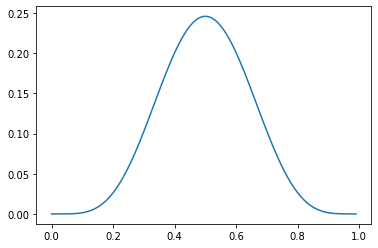

In [21]:
# Maximum Likelihood

from scipy.special import comb
import matplotlib.pyplot as plt

f = lambda p: comb(10,5)*(p**5)*(1-p)**(5)

plt.plot(np.arange(0,1,0.01),[f(p) for p in np.arange(0,1,0.01)])

In [18]:
s = np.random.binomial(n, p, 1000)

C:\Users\fabio\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\fabio\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


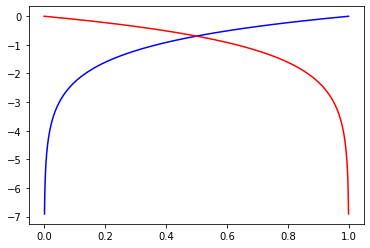

In [29]:
# g = lambda y,yhat : np.log(yhat)*y + np.log(1-yhat)*(1-y)
g = lambda y,yhat : (np.log(yhat)**y)*(np.log(1-yhat)**(1-y))

plt.plot(np.arange(0,1,0.001),[g(1,yhat) for yhat in np.arange(0,1,0.001)], c='b');
plt.plot(np.arange(0,1,0.001),[g(0,yhat) for yhat in np.arange(0,1,0.001)], c='r');


In [52]:
import matplotlib.pyplot as plt

N   = 9
pts = np.random.random((N,3))
colors = np.round(pts[:,2]*10)%3

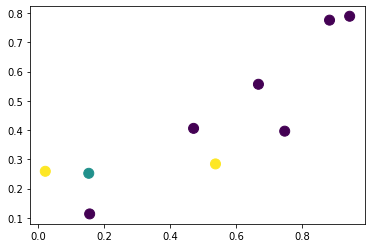

In [53]:
plt.scatter(pts[:,0],pts[:,1], s=100, c=colors)


In [55]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(pts[:,[0,1]])
kmeans.labels_

array([1, 0, 1, 0, 0, 0, 1, 1, 0])

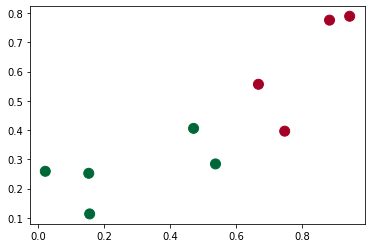

In [60]:
plt.scatter(pts[:,0],pts[:,1], s=100, c=kmeans.labels_ ,cmap='RdYlGn_r')

In [61]:
# Na unha - rand index
(8+12)/(9*8/2)

0.5555555555555556

In [64]:
# Usando sklearn - rand index
rand_score(colors, kmeans.labels_)

0.5555555555555556

In [65]:
# Na unha - jaccard
(8)/(9*8/2)

0.2222222222222222

In [69]:
from sklearn.metrics import jaccard_score

jaccard_score(colors, kmeans.labels_, average=None)[0]


0.2222222222222222

In [5]:
from sklearn.metrics.cluster import adjusted_rand_score, rand_score
# adjusted_rand_score([0, 0, 1], [1, 1, 2])

# x:0
# bola : 1 
#     trian: 2

rand_score([0, 0, 0, 1, 1, 1, 2 ,1 , 2], [0, 0, 0, 0, 0, 1, 1 ,1 , 1])

0.6111111111111112

In [6]:
22/36

0.6111111111111112

In [1]:
import operator as op
from functools import reduce

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom

In [2]:
ncr(6, 2)

15